# The COVIDNetX challenge

<img src="https://www.psycharchives.org/retrieve/096175aa-f7f2-4970-989d-d934c30b5551" alt="drawing" width="400"/>

The following is a classification challenge using the [COVID-X dataset](https://github.com/lindawangg/COVID-Net/blob/master/docs/COVIDx.md).
The goal is to predict whether a person has COVID-19 or not based on chest X-RAY images.

There are two different categories: `positive` and `negative`. `positive` means a person has COVID-19, `negative` means a person
has not COVID-19.

The metric we use is F1 (https://en.wikipedia.org/wiki/F1_score). The goal is to maximize F1.

The data contains images with their associated labels.

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

### Load Data

In [2]:
data_dir = 'data/'
# data_dir = 'data_subset/'

df = pd.read_csv(data_dir+'train.csv')
test_df = pd.read_csv(data_dir+'submission_valid.csv')

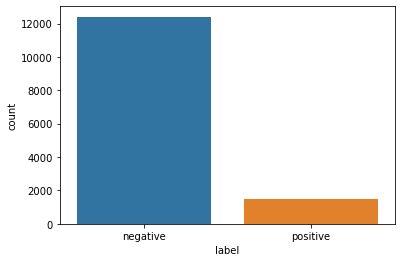

In [9]:
(df.label.value_counts())/len(df)
sns.countplot(data=df, x='label');

### Add "img_shape" Column

In [3]:
df['img_shape'] = df.image.apply(lambda img: Image.open(data_dir+'train/'+img).size)
df.sample(10)

,image,label,img_shape
10678,5dc937cf101e183a536dec41575eca47.png,negative,"(1024, 1024)"
2309,8df9cc4314fa34ea23db4db6bf3a1812.png,negative,"(1024, 1024)"
9080,aff5d61bfadbc8b3ce3da7264d423c9f.png,negative,"(1024, 1024)"
516,fde4b735b88153116e46a00b62d5dadb.png,negative,"(1024, 1024)"
346,adb607a48df1842d66f6d0372903e9ce.png,positive,"(256, 256)"
9676,a8b43fef2966dcb84c1e3e6b98ed34c8.png,negative,"(1024, 1024)"
7840,25bc96c40675bca0a04100e7753a2076.png,negative,"(1024, 1024)"
11203,22b29bcc6825f9420b3a0d8483fa33c0.png,negative,"(1024, 1024)"
4375,e048389b60ebcdf7a9439ab94a339a1d.png,negative,"(1024, 1024)"
7282,8da43c0ef1342e28fbb20f828930ae47.png,negative,"(1024, 1024)"


### Image Shapes

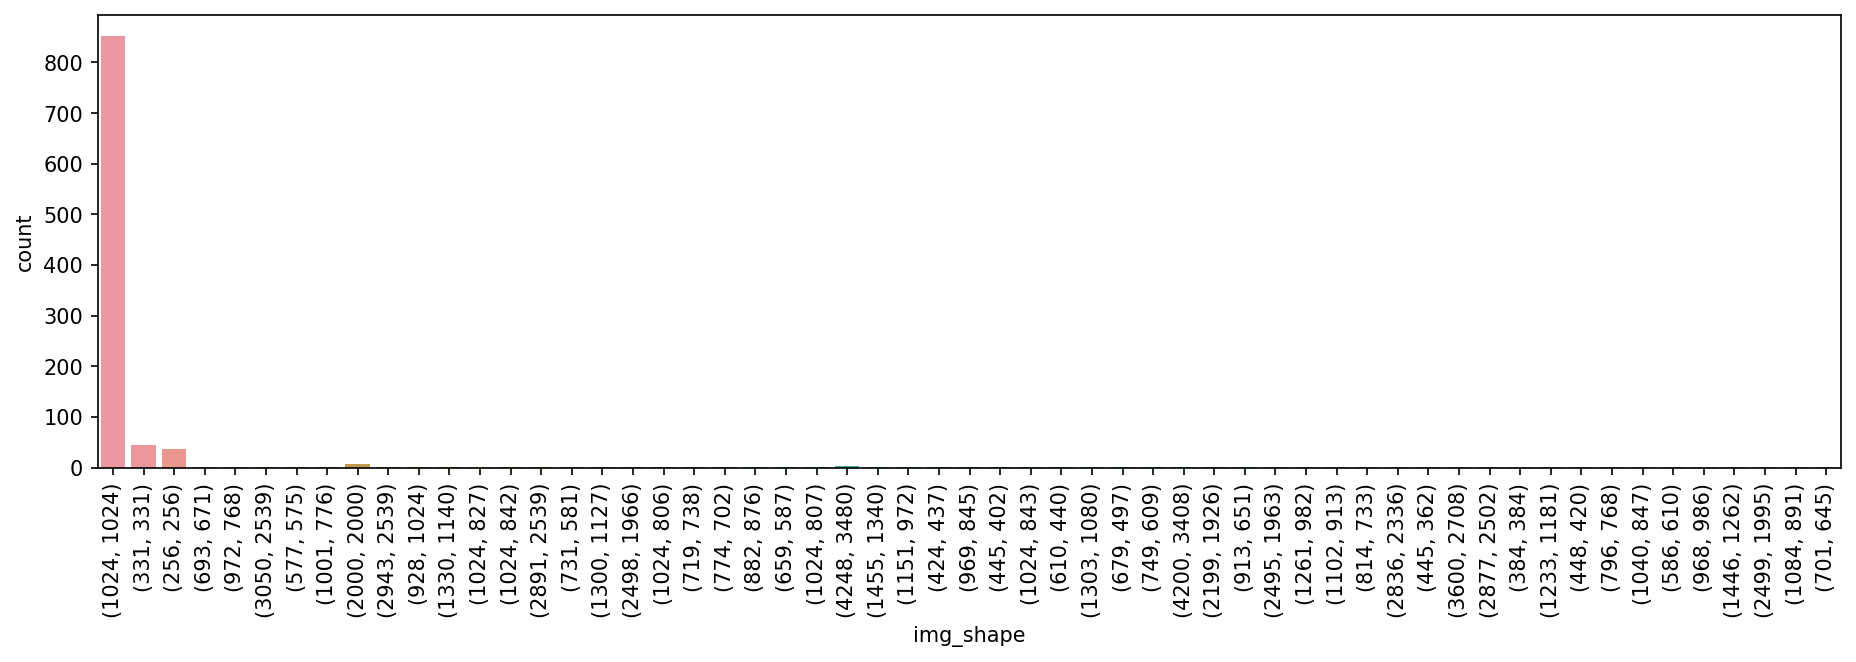

In [4]:
fig = plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=df.sample(1000, random_state=42), x='img_shape');
plt.xticks(rotation=90);

In [5]:
df.img_shape.value_counts()/len(df)

(1024, 1024)    0.866638
(331, 331)      0.037364
(256, 256)      0.034706
(2000, 2000)    0.006395
(3050, 2539)    0.003665
                  ...   
(1650, 1816)    0.000072
(2891, 2539)    0.000072
(1787, 1800)    0.000072
(597, 531)      0.000072
(1052, 1056)    0.000072
Name: img_shape, Length: 580, dtype: float64

**NOTE**: 87% images have shape: 1024x1024

### Covid "positive" Image Shapes

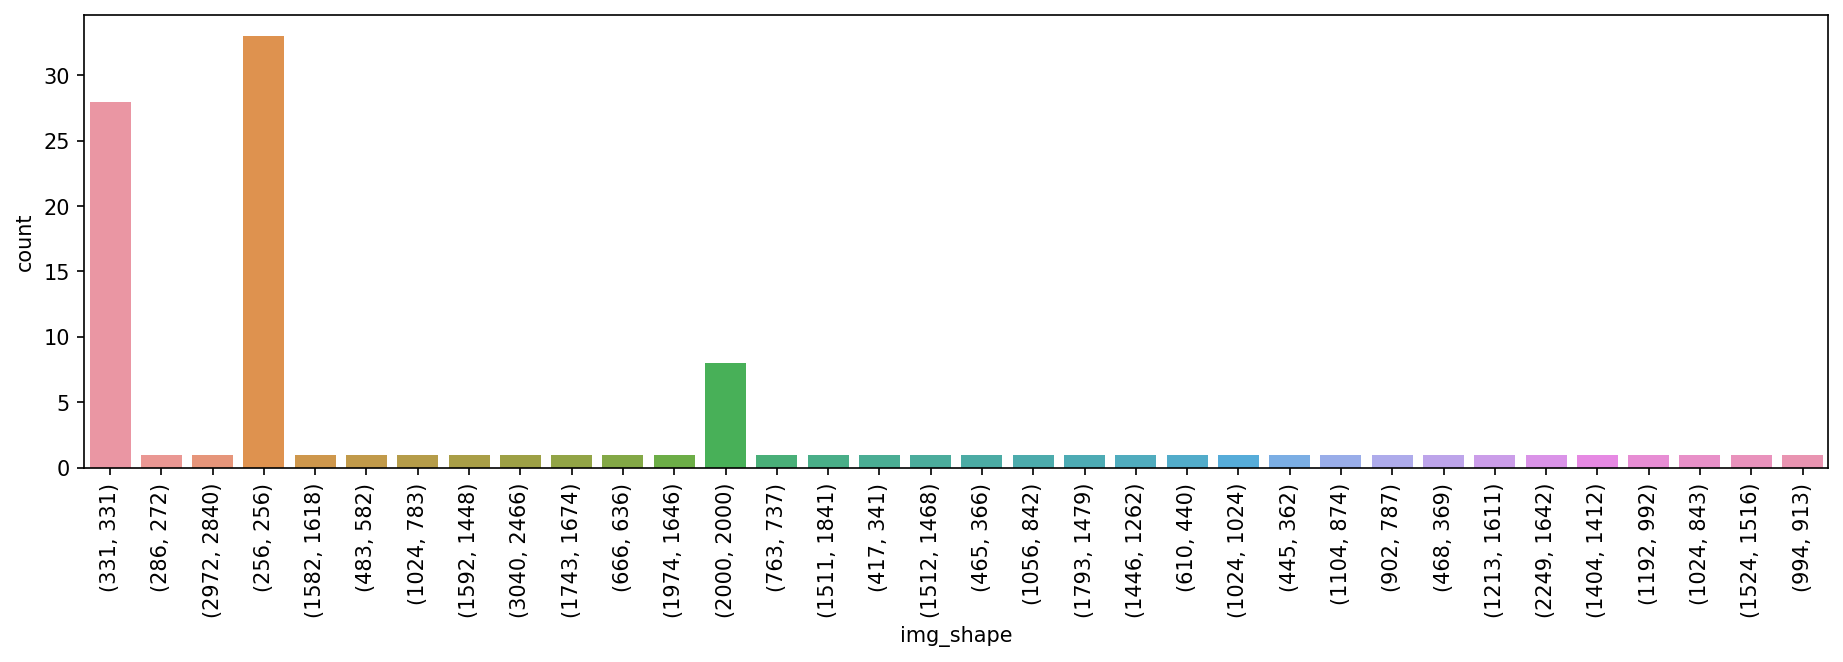

In [6]:
pos = df[df.label=='positive']
fig = plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=pos.sample(100, random_state=42), x='img_shape');
plt.xticks(rotation=90);

In [7]:
pos.img_shape.value_counts()/len(pos)

(331, 331)      0.344371
(256, 256)      0.319868
(2000, 2000)    0.044371
(1084, 891)     0.018543
(1024, 1024)    0.005298
                  ...   
(2386, 1835)    0.000662
(994, 913)      0.000662
(1723, 1466)    0.000662
(3040, 2466)    0.000662
(1799, 1472)    0.000662
Name: img_shape, Length: 363, dtype: float64

In [8]:
pos_non_1024x1024 = pos[pos.img_shape!=(1024,1024)]
print(f"% of covid positive images which are not of 1024x1024 shape: {len(pos_non_1024x1024)/len(pos)}")

% of covid positive images which are not of 1024x1024 shape: 0.9947019867549669


**NOTE**: 99% X-ray images of covid positive cases are _not_ of 1024x1024 shape

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)